# CSE 572: Homework 2

This notebook provides a template and starting code to implement the Homework 2 assignment.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button. 

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, click File > Print > Save as PDF.

## Prepare the dataset

In this homework, you will compare the effect of multiple dimensionality reduction techniques on the classification performance for the [Covertype](https://archive.ics.uci.edu/ml/datasets/Covertype) dataset.  

Each instance in this dataset represents a 30 m x 30 m patch of forested land described by 54 attributes. The attributes include features such as elevation, aspect, slope, soil characteristics, etc. Each sample has an associated forest cover type (e.g., douglas fir or Ponderosa pine) represented by an integer value 1 to 7. The dataset was created by the Department of Forest Sciences at Colorado State University and the US Forest Service in 1998. 

In [1]:
import numpy as np

# Set the random seed for reproducibility
seed = 0
np.random.seed(seed)

In [2]:
import pandas as pd

# Load and visualize a sample of the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz', header=None)

data.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
215988,2767,66,17,210,18,1190,234,204,96,2251,...,0,0,0,0,0,0,0,0,0,2
424155,2724,160,19,60,4,1350,236,240,127,2514,...,0,0,0,0,0,0,0,0,0,2
274437,2360,65,7,127,21,1377,227,226,134,339,...,0,0,0,0,0,0,0,0,0,3
65944,2995,45,4,285,30,5125,221,231,146,5706,...,0,0,0,0,0,0,0,0,0,2
11015,2400,106,27,150,63,342,253,196,51,811,...,0,0,0,0,0,0,0,0,0,3
85781,2656,20,9,323,73,1082,214,221,143,1036,...,0,0,0,0,0,0,0,0,0,2
505270,2992,105,36,201,141,1211,252,170,12,1584,...,0,1,0,0,0,0,0,0,0,1
169233,3110,32,14,379,43,5028,216,208,125,2845,...,0,0,0,0,0,0,0,0,0,1
373091,3242,40,15,85,19,3330,220,207,118,3164,...,0,0,0,0,0,0,0,0,0,2
181345,3025,273,10,391,24,2797,192,243,190,234,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Separate the label column from the data matrix
labels = data[data.columns[-1]]
data = data[data.columns[:-1]]

In [4]:
labels.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: 54, dtype: int64

In [5]:
data.shape

(581012, 54)

In [6]:
labels.shape

(581012,)

In [7]:
# YOUR CODE HERE

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.3, random_state=seed
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Dimensionality reduction

You will implement 2 dimensionality reduction techniques:
- PCA (linear)
- Autoencoder neural network (non-linear)

For PCA, you will create a plot of the total fraction of explained variance by the first 1 through 20 principal components (as we did in Lab 12). Choose the number of principal components to retain based on the inflection point of this plot, i.e., the point at which the increase in total explained variance begins to plateau (as we did in Lab 12). Note that this may not be a sharp change in the curve; choose the number of components that you think is best based on the overall trend.

For the autoencoder neural network, implement a network with the following layers:
1. Input layer (# units = 54) [encoder]
2. Hidden layer (# units = 28) [encoder]
3. Hidden layer (# units = number of PCs retained for PCA) [encoded/bottleneck layer]
4. Hidden layer (# units = 28) [decoder]
5. Output layer (# units = 54) [decoder]

For example, if you chose to use 3 principal components in PCA, you will have a bottleneck layer of 3 units in your autoencoder. 

Use ‘relu’ activation for hidden layers and ‘sigmoid’ activation for the output layer, ‘sgd’ (stochastic gradient descent) for the optimizer, and ‘mse’ (mean squared error) as the loss function. Train your model for 40 epochs with a batch size of 256. Lab 13 will be a useful guide for this implementation. Note that you will use the predict() function with only the encoder part of the model to transform your features into the encoded (reduced-dimension) representation.

### PCA

In [9]:
# YOUR CODE HERE

# Perform PCA and choose the number of components based on explained variance
n_components = 20
pca = PCA(n_components=n_components).fit(X_train)

In [10]:
for i in range(n_components):
    print('Percentage of variance explained by PC {}: {}'.format(i+1, pca.explained_variance_ratio_[i]))
    
print('Total variance explained by 20 PCs: {}'.format(np.sum(pca.explained_variance_ratio_)))

Percentage of variance explained by PC 1: 0.06854510716367838
Percentage of variance explained by PC 2: 0.05415603987096903
Percentage of variance explained by PC 3: 0.044426766653690004
Percentage of variance explained by PC 4: 0.03708081109099429
Percentage of variance explained by PC 5: 0.02807135700180049
Percentage of variance explained by PC 6: 0.026995288955606253
Percentage of variance explained by PC 7: 0.022131735175589397
Percentage of variance explained by PC 8: 0.021422490437757267
Percentage of variance explained by PC 9: 0.020203559378511725
Percentage of variance explained by PC 10: 0.01995824478040058
Percentage of variance explained by PC 11: 0.019648116576517004
Percentage of variance explained by PC 12: 0.01952404929357709
Percentage of variance explained by PC 13: 0.019251590529537697
Percentage of variance explained by PC 14: 0.019022006315546985
Percentage of variance explained by PC 15: 0.018971774413498184
Percentage of variance explained by PC 16: 0.0189152790

[0.06854510716367838, 0.1227011470346474, 0.1671279136883374, 0.2042087247793317, 0.23228008178113219, 0.25927537073673845, 0.28140710591232787, 0.30282959635008516, 0.32303315572859687, 0.34299140050899746, 0.36263951708551445, 0.38216356637909155, 0.4014151569086292, 0.42043716322417624, 0.4394089376376744, 0.4583242167089847, 0.47715104308777107, 0.4959127485163833, 0.5146288695416517, 0.5333122091580813]


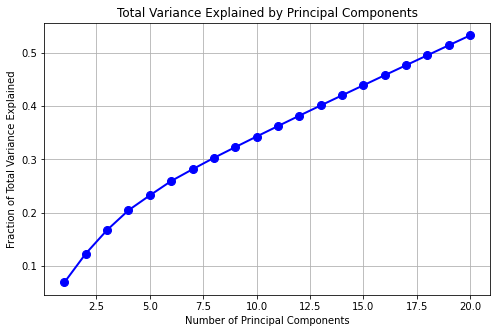

In [11]:
import matplotlib.pyplot as plt
pcaResults=[]
sumOfPCAs=np.sum(pca.explained_variance_ratio_)

pcaResults.append((pca.explained_variance_ratio_[0]))

for i in range(1,n_components):
     pcaResults.append(pca.explained_variance_ratio_[i]+pcaResults[i-1])

print(pcaResults)
plt.figure(figsize=(8, 5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], pcaResults, '-bo', linewidth=2, markersize=8)

# Add axis labels and a title
plt.xlabel('Number of Principal Components')
plt.ylabel('Fraction of Total Variance Explained')
plt.title('Total Variance Explained by Principal Components')

# Add a grid to the plot
plt.grid(True)

# Show the plot
plt.show()

In [12]:
# I am selecting 5 components.
n_best_components = 5
pca = PCA(n_components=n_best_components).fit(X_train)
PCAX_train = pca.transform(X_train)
PCAX_test = pca.transform(X_test)

PCAX_train.shape

(406708, 5)

### Autoencoder neural network

In [13]:
# YOUR CODE HERE
import tensorflow as tf
seed = 0
tf.keras.utils.set_random_seed(seed)

import keras
from keras import layers

PCA_components = 5

# Input
input = keras.Input(shape=(X_train.shape[1],))

#InputLayer
# inputLayer = layers.Dense(54, activation='relu')(input) 

# Hidden Layer
hiddenLayer1 = layers.Dense(28, activation='relu')(input)

# BottleNeckLayer
bottleNeckLayer = layers.Dense(PCA_components, activation='relu')(hiddenLayer1)

# Hidden Layer
hiddenLayer2 = layers.Dense(28, activation='relu')(bottleNeckLayer)

# Pre-Output Layer
preOutputLayer = layers.Dense(54, activation='relu')(hiddenLayer2)

# Output Layer
outputLayer = layers.Dense(X_train.shape[1], activation='sigmoid')(preOutputLayer)

# Create AutoEncoder
autoencoder = keras.Model(input, outputLayer)

# Create Encoder
encoder = keras.Model(input, bottleNeckLayer)

In [14]:
# Optimizer
autoencoder.compile(optimizer='sgd', loss='mse')

In [15]:
# Train Autoencoder

autoencoder.fit(x=X_train, y=X_train,
                epochs=40,
                batch_size=256,
                shuffle=True)

Epoch 1/40
1589/1589 [==============================] - 9s 5ms/step - loss: 1.2314
Epoch 2/40
1589/1589 [==============================] - 3s 2ms/step - loss: 1.1426
Epoch 3/40
1589/1589 [==============================] - 3s 2ms/step - loss: 1.0147
Epoch 4/40
1589/1589 [==============================] - 4s 2ms/step - loss: 1.0006
Epoch 5/40
1589/1589 [==============================] - 4s 2ms/step - loss: 0.9984
Epoch 6/40
1589/1589 [==============================] - 3s 2ms/step - loss: 0.9971
Epoch 7/40
1589/1589 [==============================] - 3s 2ms/step - loss: 0.9958
Epoch 8/40
1589/1589 [==============================] - 4s 3ms/step - loss: 0.9947
Epoch 9/40
1589/1589 [==============================] - 3s 2ms/step - loss: 0.9937
Epoch 10/40
1589/1589 [==============================] - 3s 2ms/step - loss: 0.9927
Epoch 11/40
1589/1589 [==============================] - 4s 2ms/step - loss: 0.9918
Epoch 12/40
1589/1589 [==============================] - 4s 3ms/step - loss: 0.9908
E

In [16]:
AE_X_train = encoder.predict(X_train)
AE_X_test = encoder.predict(X_test)

5447/5447 [==============================] - 8s 1ms/step


## Classification

You will use a k Nearest Neighbors classifier with 3 neighbors for the classification model (using Scikit-learn). Leave all other hyperparameters as their default values. You will train 3 separate random forest classifiers with 1) input data transformed using PCA, 2) input data transformed using autoencoder, 3) random subset of features. 

For the random subset of features, you should randomly select m features where m is the number of principal components and size of autoencoder bottleneck that you chose for #1 and #2. For example, if you used 3 principal components for #2 then you should randomly select a subset of 3 features.

In [17]:
# YOUR CODE HERE

# PCA + KNN
from sklearn.neighbors import KNeighborsClassifier

knnPCA = KNeighborsClassifier(n_neighbors=3)


knnPCA.fit(PCAX_train, y_train)

y_predPCA = knnPCA.predict(PCAX_test)



In [18]:
# YOUR CODE HERE

# AUTO-ENCODER + KNN
from sklearn.neighbors import KNeighborsClassifier

knnAE = KNeighborsClassifier(n_neighbors=3)

knnAE.fit(AE_X_train, y_train)

y_predAE = knnAE.predict(AE_X_test)

In [19]:
# YOUR CODE HERE
np.random.seed(0)
columns = list(np.random.choice(range(data.shape[1]), PCA_components, replace=False))
print(columns)
BASE_X_train=X_train[:,columns]
BASE_X_test=X_test[:,columns]

# RANDOM STATE + KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(BASE_X_train, y_train)

y_pred = knn.predict(BASE_X_test)

[53, 33, 48, 26, 11]


## Evaluation

Your final model evaluation should be performed on the test set. You will compare the results of the two dimensionality reduction + kNN methods (PCA + kNN, Autoencoder + kNN) as well as a baseline kNN classifier that does selects a random subset of features from the original attributes. For each of the 3 methods, print the classification report (including class-wise precision, recall, F1 + overall accuracy) and plot the confusion matrix. 

In [20]:
# YOUR CODE HERE
# PCA + KNN Results

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_predPCA, y_test))

accPCA = accuracy_score(y_test, y_predPCA)
print(f"Accuracy score for PCA + KNN: {accPCA:.2f}")


              precision    recall  f1-score   support

           1       0.83      0.84      0.84     62755
           2       0.87      0.85      0.86     87068
           3       0.81      0.81      0.81     10625
           4       0.60      0.74      0.67       671
           5       0.57      0.68      0.62      2397
           6       0.63      0.68      0.65      4878
           7       0.86      0.89      0.87      5910

    accuracy                           0.84    174304
   macro avg       0.74      0.78      0.76    174304
weighted avg       0.84      0.84      0.84    174304

Accuracy score for PCA + KNN: 0.84


In [21]:
labels

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: 54, Length: 581012, dtype: int64

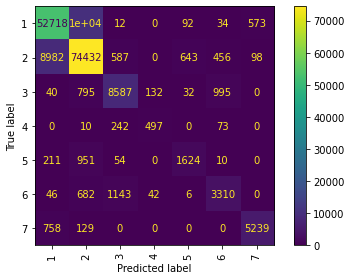

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    knnPCA, PCAX_test, y_test, xticks_rotation="vertical"
)

plt.tight_layout()
plt.show()

In [23]:
# AE + KNN Results

print(classification_report(y_predAE, y_test))
accAE = accuracy_score(y_test, y_predAE)
print(f"Accuracy score for Auto Encoder + KNN: {accAE:.2f}")

              precision    recall  f1-score   support

           1       0.66      0.63      0.65     66362
           2       0.72      0.70      0.71     87842
           3       0.54      0.59      0.56      9754
           4       0.21      0.42      0.28       415
           5       0.24      0.46      0.32      1494
           6       0.29      0.46      0.35      3291
           7       0.60      0.71      0.65      5146

    accuracy                           0.66    174304
   macro avg       0.47      0.57      0.50    174304
weighted avg       0.67      0.66      0.67    174304

Accuracy score for Auto Encoder + KNN: 0.66


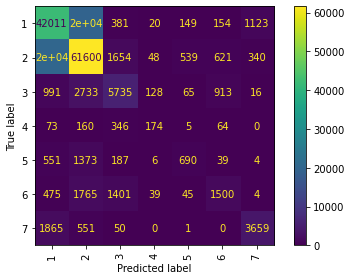

In [24]:
ConfusionMatrixDisplay.from_estimator(
    knnAE, AE_X_test, y_test, xticks_rotation="vertical"
)

plt.tight_layout()
plt.show()

In [25]:
# BASELINE KNN Results
print(classification_report(y_pred, y_test))
accAE = accuracy_score(y_test, y_pred)
print(f"Accuracy score for Baseline KNN: {accAE:.2f}")

              precision    recall  f1-score   support

           1       0.10      0.63      0.18     10304
           2       0.97      0.51      0.66    162995
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.10      0.61      0.17      1005

    accuracy                           0.51    174304
   macro avg       0.17      0.25      0.14    174304
weighted avg       0.91      0.51      0.63    174304

Accuracy score for Baseline KNN: 0.51


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


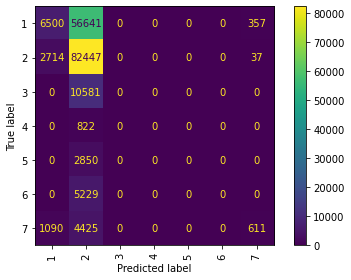

In [26]:
ConfusionMatrixDisplay.from_estimator(
    knn, BASE_X_test, y_test, xticks_rotation="vertical"
)

plt.tight_layout()
plt.show()

## Discussion

Briefly summarize the results from your three compared models.


Summary of the results is:
Overall Accuracy summary is:
Baseline Model: 84% \
PCA + KNN: 66% \
Auto Encoder + KNN: 51% \

The PCA model and the autoencoder's F1 score differ by small factor as compared to baseline model observed to be. While the PCA model with all the features outperforms the performance by a considerable margin, there is a very significant tradeoff between the number of attributes and accuracy and choosing components that drive the majority of the result. 

We used 5 components for an accuracy of 84% (PCA) and 66% (Autoencoders) while we used 5 random of them to get an accuracy of 51%.

Although training an baseline model required far more time and compute than training a PCA model, the PCA model still outperformed the autoencoders model.

From this lab, we learned that, to train a model we don't need all its components or features, we just need enough components that contribute or vary the results the most to build a model that can predict with high accuracy.